In [11]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Math, HTML, Markdown

In [12]:
# helper functions

dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def latex(*args, sep='', align=True, as_str=False):
    '''
    display math latex
    '''
    terms = []
    for arg in args:
        if isinstance(arg, (sp.Basic, sp.Matrix)):
            terms.append(sp.latex(arg))
        else:
            terms.append(str(arg))
    
    res = sep.join(terms)
    
    if align:
        res = r'\begin{align}' + res + r'\end{align}'
    
    if as_str:
        return res
    
    display(Math(res))
    
    
def disp(content, parser=Markdown):
    """
    Display content with parser. Default markdown.
    """
    
    display(parser(str(content)))
    

def matrix(rows=3, cols=3, symbol='x'):
    """
    Make quick sympy matrix with indexed symbol elements
    """
    # symbol components
    comps = sp.symbols(r'%s_{1:%s\,1:%s}' % (symbol, rows+1, cols+1))
    
    # components array
    comps_array = np.array(comps).reshape(rows, cols)
    
    # return sympy
    return sp.Matrix(comps_array)


def plot_vec(ax, v, start=[0, 0], **kwargs):
    
    default = dict(alpha=0.5, scale=1, width=0.0125, angles='xy', scale_units='xy')
    default.update(kwargs)
    
    return ax.quiver(*start, *v, **default)

## Central Limit Theorem

Initial: Mean 0.500 std 0.288


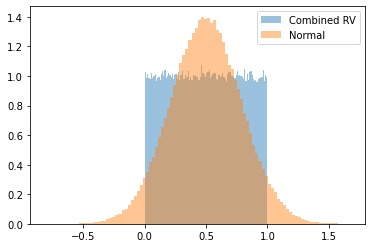


[2] Mean 1.500 std 0.500


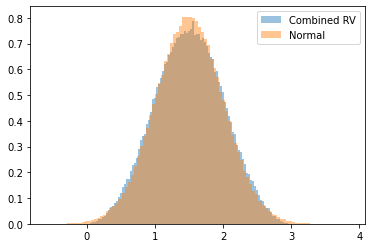


[4] Mean 2.501 std 0.645


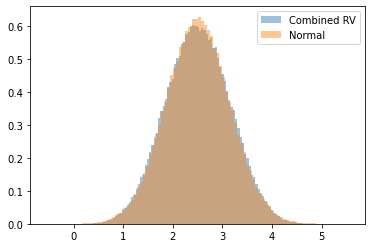


[6] Mean 3.500 std 0.764


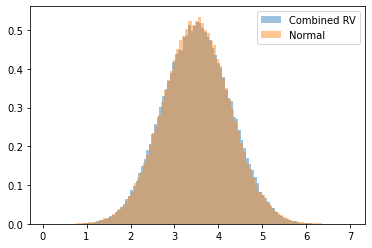


[8] Mean 4.502 std 0.866


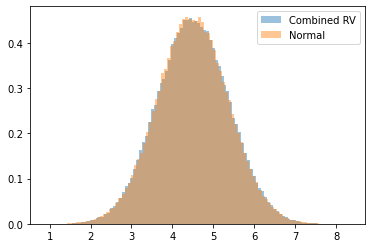


[10] Mean 5.501 std 0.959


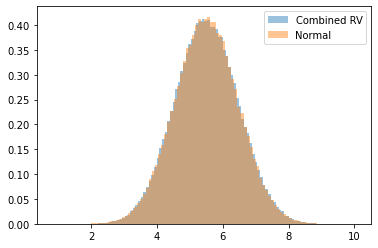

In [5]:
# central limit theorem

size = 200_000
params = dict(bins=100, alpha=0.45, density=True)
n_iter = 10

# probability density function of random variable
pdf = np.random.uniform


# plot distribution of random variable
rv = pdf(size=size)

# plot pdf of normal with same mean and variance
mu, sigma = rv.mean(), rv.std()
normal = np.random.normal(mu, sigma, size=size)


# plot initial distribution
print(f'Initial: Mean {mu:.3f} std {sigma:.3f}')

plt.hist(rv, **params, label="Combined RV")
plt.hist(normal, **params, label="Normal")

plt.legend()
plt.show()


for i in range(n_iter):
    
    # combination of independent random variables
    rv += pdf(size=size)
    
    mu, sigma = rv.mean(), rv.std()
    
    # normal with same mean and variance
    normal = np.random.normal(mu, sigma, size=size)

    # plot convergence
    j = i + 1
    if j % int(n_iter/5) == 0:
        
        print(f'\n[{j}] Mean {mu:.3f} std {sigma:.3f}')
        
        plt.hist(rv, **params, label="Combined RV")
        plt.hist(normal, **params, label="Normal")
        
        plt.legend()
        plt.show()